In [919]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import sys
!{sys.executable} -m pip install xgboost
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
import pickle

In [920]:
solar = pd.read_csv('solar.csv')

In [921]:
solar.head()

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,percent_covered,percent_qualified,number_of_panels_n,number_of_panels_s,number_of_panels_e,number_of_panels_w,number_of_panels_f,number_of_panels_median,number_of_panels_total,kw_median,kw_total,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets,carbon_offset_metric_tons,existing_installs_count,center_point
0,19149,Pennsylvania,40.051229,40.026879,-75.041355,-75.092596,40.037404,-75.065705,997.9,4602,90.102627,27.443497,3408,5878,5145,3187,146724,11,164342,2.75,41085.50,9.031303e+05,1.850869e+06,1.576591e+06,8.580837e+05,4.382758e+07,3332.078650,4.901625e+07,"[[0,3888],[5,430],[10,80],[15,39],[20,24],[25,...",31147.899203,3,POINT(-75.0657051746548 40.0374044403417)
1,19120,Pennsylvania,40.052709,40.012403,-75.096987,-75.138747,40.034398,-75.120887,997.9,6086,89.833650,31.392170,7557,16061,12854,10272,216962,12,263706,3.00,65926.50,1.950523e+06,5.073438e+06,3.776295e+06,2.820022e+06,6.464504e+07,3572.812305,7.826531e+07,"[[0,4877],[5,722],[10,107],[15,67],[20,40],[25...",49734.525773,2,POINT(-75.120887243506 40.0343982932811)
2,19132,Pennsylvania,40.005893,39.986358,-75.150639,-75.190697,39.995681,-75.169645,997.9,5157,88.181975,33.550192,4664,13486,9191,8378,174776,12,210495,3.00,52623.75,1.198444e+06,4.355742e+06,2.644355e+06,2.354784e+06,5.176022e+07,3379.915637,6.231354e+07,"[[0,4250],[5,463],[10,78],[15,68],[20,37],[25,...",39597.801378,0,POINT(-75.169645159245 39.9956814907579)
3,19134,Pennsylvania,40.007334,39.977417,-75.087213,-75.131005,39.992451,-75.111935,997.9,7551,90.754669,35.156905,10910,23038,14457,17419,378488,12,444312,3.00,111078.00,2.835592e+06,7.368522e+06,3.994670e+06,5.198416e+06,1.131108e+08,3582.464453,1.325080e+08,"[[0,5795],[5,831],[10,179],[15,117],[20,87],[2...",84203.600230,3,POINT(-75.1119347717865 39.9924510629131)
4,19138,Pennsylvania,40.071452,40.039948,-75.147013,-75.176449,40.056627,-75.156949,997.9,4256,93.056346,37.186544,2417,6650,5865,2916,100013,12,117861,3.00,29465.25,6.326130e+05,2.038111e+06,1.696291e+06,8.202375e+05,2.960903e+07,3545.397314,3.479628e+07,"[[0,3505],[5,529],[10,57],[15,29],[20,12],[25,...",22111.668631,3,POINT(-75.1569492782584 40.0566267715424)


In [922]:
solar.shape

(11497, 32)

In [923]:
solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11497 entries, 0 to 11496
Data columns (total 32 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   region_name                           11497 non-null  int64  
 1   state_name                            11497 non-null  object 
 2   lat_max                               11497 non-null  float64
 3   lat_min                               11497 non-null  float64
 4   lng_max                               11497 non-null  float64
 5   lng_min                               11497 non-null  float64
 6   lat_avg                               11497 non-null  float64
 7   lng_avg                               11497 non-null  float64
 8   yearly_sunlight_kwh_kw_threshold_avg  11497 non-null  float64
 9   count_qualified                       11497 non-null  int64  
 10  percent_covered                       11497 non-null  float64
 11  percent_qualifi

In [924]:
solar.isna().sum()

region_name                             0
state_name                              0
lat_max                                 0
lat_min                                 0
lng_max                                 0
lng_min                                 0
lat_avg                                 0
lng_avg                                 0
yearly_sunlight_kwh_kw_threshold_avg    0
count_qualified                         0
percent_covered                         0
percent_qualified                       0
number_of_panels_n                      0
number_of_panels_s                      0
number_of_panels_e                      0
number_of_panels_w                      0
number_of_panels_f                      0
number_of_panels_median                 0
number_of_panels_total                  0
kw_median                               0
kw_total                                0
yearly_sunlight_kwh_n                   0
yearly_sunlight_kwh_s                   0
yearly_sunlight_kwh_e             

In [925]:
select_columns = ['region_name', 'state_name', 'lat_avg', 'lng_avg', 'number_of_panels_median', 'number_of_panels_total', 'percent_covered', 'kw_median', 'kw_total', 'yearly_sunlight_kwh_median', 'yearly_sunlight_kwh_total', 'carbon_offset_metric_tons', 'existing_installs_count', 'center_point']

In [926]:
solar_c = solar[select_columns].copy()
print(solar_c)

       region_name    state_name    lat_avg     lng_avg  \
0            19149  Pennsylvania  40.037404  -75.065705   
1            19120  Pennsylvania  40.034398  -75.120887   
2            19132  Pennsylvania  39.995681  -75.169645   
3            19134  Pennsylvania  39.992451  -75.111935   
4            19138  Pennsylvania  40.056627  -75.156949   
...            ...           ...        ...         ...   
11492        44847          Ohio  41.239992  -82.702335   
11493        97457        Oregon  43.008561 -123.299984   
11494        53501     Wisconsin  42.604123  -89.069882   
11495        21837      Maryland  38.470054  -75.743964   
11496        17502  Pennsylvania  40.096674  -76.667030   

       number_of_panels_median  number_of_panels_total  percent_covered  \
0                           11                  164342        90.102627   
1                           12                  263706        89.833650   
2                           12                  210495        88.1

In [927]:
solar_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11497 entries, 0 to 11496
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region_name                 11497 non-null  int64  
 1   state_name                  11497 non-null  object 
 2   lat_avg                     11497 non-null  float64
 3   lng_avg                     11497 non-null  float64
 4   number_of_panels_median     11497 non-null  int64  
 5   number_of_panels_total      11497 non-null  int64  
 6   percent_covered             11497 non-null  float64
 7   kw_median                   11497 non-null  float64
 8   kw_total                    11497 non-null  float64
 9   yearly_sunlight_kwh_median  11497 non-null  float64
 10  yearly_sunlight_kwh_total   11497 non-null  float64
 11  carbon_offset_metric_tons   11497 non-null  float64
 12  existing_installs_count     11497 non-null  int64  
 13  center_point                114

In [928]:
solar_c.duplicated().sum()

0

In [929]:
solar_c.describe().applymap(lambda x: f"{x:0.2f}")

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count
count,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00
mean,48263.69,37.64,-90.45,87.50,396335.12,79.61,21.87,99083.78,27261.51,127767781.51,68227.15,58.75
std,30091.14,5.30,16.15,395.97,390148.26,30.19,98.99,97537.06,123918.87,132115129.25,72154.60,169.35
min,603.00,17.99,-158.08,8.00,8.00,0.01,2.00,2.00,1977.28,2405.86,0.00,0.00
25%,21713.00,33.94,-97.12,31.00,65604.00,75.21,7.75,16401.00,9179.73,19820818.47,10635.01,0.00
50%,45211.00,39.04,-85.65,42.00,289766.00,95.54,10.50,72441.50,12683.07,88862867.19,45152.27,5.00
75%,76630.00,41.36,-78.39,55.00,616714.00,98.42,13.75,154178.50,18082.56,194164944.62,103611.42,28.00
max,99712.00,64.90,-65.89,19151.00,3279590.00,100.00,4787.75,819897.50,6014657.46,1190968010.33,801735.95,2692.00


In [930]:
solar_c.head()

,region_name,state_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point
0,19149,Pennsylvania,40.037404,-75.065705,11,164342,90.102627,2.75,41085.50,3332.078650,4.901625e+07,31147.899203,3,POINT(-75.0657051746548 40.0374044403417)
1,19120,Pennsylvania,40.034398,-75.120887,12,263706,89.833650,3.00,65926.50,3572.812305,7.826531e+07,49734.525773,2,POINT(-75.120887243506 40.0343982932811)
2,19132,Pennsylvania,39.995681,-75.169645,12,210495,88.181975,3.00,52623.75,3379.915637,6.231354e+07,39597.801378,0,POINT(-75.169645159245 39.9956814907579)
3,19134,Pennsylvania,39.992451,-75.111935,12,444312,90.754669,3.00,111078.00,3582.464453,1.325080e+08,84203.600230,3,POINT(-75.1119347717865 39.9924510629131)
4,19138,Pennsylvania,40.056627,-75.156949,12,117861,93.056346,3.00,29465.25,3545.397314,3.479628e+07,22111.668631,3,POINT(-75.1569492782584 40.0566267715424)


In [931]:
print(solar_c['existing_installs_count'].value_counts())
print()
# percent of 
print(solar_c['existing_installs_count'].value_counts(normalize=True) * 100)

existing_installs_count
0      3248
1       792
2       579
4       406
3       401
       ... 
383       1
488       1
780       1
406       1
791       1
Name: count, Length: 715, dtype: int64

existing_installs_count
0      28.250848
1       6.888754
2       5.036096
4       3.531356
3       3.487866
         ...    
383     0.008698
488     0.008698
780     0.008698
406     0.008698
791     0.008698
Name: proportion, Length: 715, dtype: float64


In [932]:
print(solar_c['number_of_panels_total'].value_counts())
print()
# percent of 
print(solar_c['number_of_panels_total'].value_counts(normalize=True) * 100)

number_of_panels_total
116        5
12         5
461        5
141        4
15         4
          ..
1067973    1
283611     1
1099951    1
45774      1
56         1
Name: count, Length: 11260, dtype: int64

number_of_panels_total
116        0.043490
12         0.043490
461        0.043490
141        0.034792
15         0.034792
             ...   
1067973    0.008698
283611     0.008698
1099951    0.008698
45774      0.008698
56         0.008698
Name: proportion, Length: 11260, dtype: float64


In [933]:
print(solar_c['kw_total'].value_counts())
print()
# percent of 
print(solar_c['kw_total'].value_counts(normalize=True) * 100)

kw_total
29.00        5
3.00         5
115.25       5
35.25        4
3.75         4
            ..
266993.25    1
70902.75     1
274987.75    1
11443.50     1
14.00        1
Name: count, Length: 11260, dtype: int64

kw_total
29.00        0.043490
3.00         0.043490
115.25       0.043490
35.25        0.034792
3.75         0.034792
               ...   
266993.25    0.008698
70902.75     0.008698
274987.75    0.008698
11443.50     0.008698
14.00        0.008698
Name: proportion, Length: 11260, dtype: float64


In [934]:
print(solar_c['percent_covered'].value_counts())
print()
# percent of 
print(solar_c['percent_covered'].value_counts(normalize=True) * 100)

percent_covered
100.000000    496
75.000000      13
80.000000      13
83.333333      11
95.833333       9
             ... 
91.254125       1
86.122881       1
97.782843       1
9.005773        1
0.205550        1
Name: count, Length: 10642, dtype: int64

percent_covered
100.000000    4.314169
75.000000     0.113073
80.000000     0.113073
83.333333     0.095677
95.833333     0.078281
                ...   
91.254125     0.008698
86.122881     0.008698
97.782843     0.008698
9.005773      0.008698
0.205550      0.008698
Name: proportion, Length: 10642, dtype: float64


In [935]:
corr_columns = ['number_of_panels_total', 'percent_covered', 'kw_total', 'yearly_sunlight_kwh_total', 'carbon_offset_metric_tons', 'existing_installs_count']

In [936]:
crl_columns = solar_c[corr_columns].copy()
print(crl_columns)

       number_of_panels_total  percent_covered   kw_total  \
0                      164342        90.102627   41085.50   
1                      263706        89.833650   65926.50   
2                      210495        88.181975   52623.75   
3                      444312        90.754669  111078.00   
4                      117861        93.056346   29465.25   
...                       ...              ...        ...   
11492                      20         0.125156       5.00   
11493                      48         0.023036      12.00   
11494                      50         2.173913      12.50   
11495                      68         0.206186      17.00   
11496                      56         0.205550      14.00   

       yearly_sunlight_kwh_total  carbon_offset_metric_tons  \
0                   4.901625e+07               31147.899203   
1                   7.826531e+07               49734.525773   
2                   6.231354e+07               39597.801378   
3              

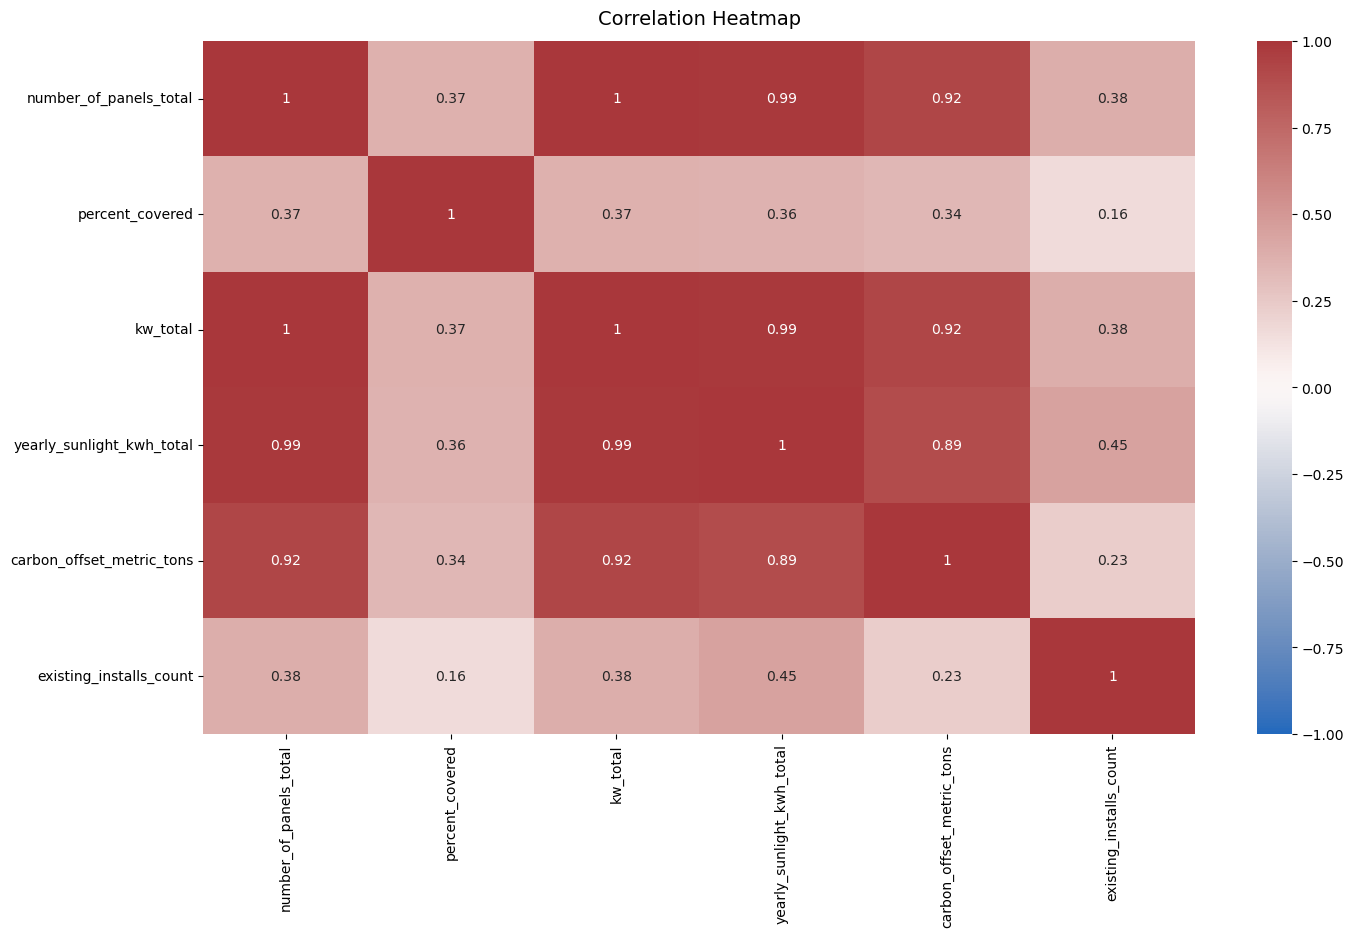

In [937]:
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(crl_columns.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

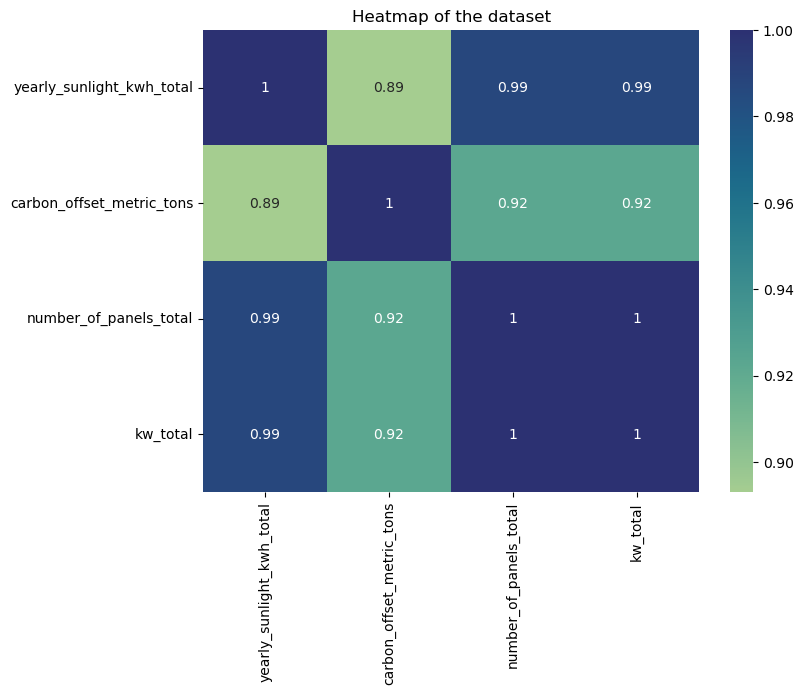

In [938]:
plt.figure(figsize=(8, 6))
sns.heatmap(solar_c[['yearly_sunlight_kwh_total', 'carbon_offset_metric_tons', 'number_of_panels_total', 'kw_total']]
.corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [939]:
print(solar_c.state_name.unique())

['Pennsylvania' 'District of Columbia' 'Indiana' 'Texas' 'California'
 'South Carolina' 'New Jersey' 'New York' 'Minnesota' 'Maryland' 'Alabama'
 'Ohio' 'Michigan' 'Illinois' 'Colorado' 'Massachusetts' 'Maine'
 'Delaware' 'Montana' 'Arizona' 'Connecticut' 'Virginia' 'West Virginia'
 'Wisconsin' 'Missouri' 'Nebraska' 'Washington' 'Rhode Island'
 'New Hampshire' 'Kentucky' 'Iowa' 'Wyoming' 'North Carolina' 'Kansas'
 'Georgia' 'Florida' 'Oregon' 'Alaska' 'Tennessee' 'Oklahoma' 'Utah'
 'Ponce' 'South Dakota' 'Louisiana' 'Vermont' 'Arkansas' 'Guaynabo'
 'San Juan' 'North Dakota' 'Idaho' 'Nevada' 'Cataño' 'New Mexico'
 'Mississippi' 'Toa Baja' 'Toa Alta' 'Bayamón' 'Trujillo Alto' 'Carolina'
 'Aguadilla' 'Arecibo' 'Hawaii' 'Canóvanas' 'Mayagüez' 'Hormigueros'
 'Dorado' 'Corozal' 'Baja California' 'Moca']


In [940]:
solar_c.groupby(['state_name']).sum().sort_values('carbon_offset_metric_tons', ascending=False).head(10)

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point
state_name,,,,,,,,,,,,,
Florida,24996289,20866.875773,-61140.745107,72743,462105732,62155.198984,18185.75,1.155264e+08,2.506018e+07,1.576179e+11,8.457291e+07,105292,POINT(-86.6740217225563 30.7980965938346)POINT...
Texas,62965374,25290.650437,-79366.578089,59657,480505530,66303.101447,14914.25,1.201264e+08,1.995835e+07,1.600396e+11,7.982047e+07,14127,POINT(-96.7733536516129 32.7919737387097)POINT...
California,112756426,43157.942832,-144800.542314,92409,652983168,108811.356155,23102.25,1.632458e+08,3.415406e+07,2.426384e+11,6.687863e+07,331274,POINT(-116.827512829095 34.2420186792512)POINT...
Ohio,20996016,19099.760185,-39052.397568,40312,171022353,37425.534003,10078.00,4.275559e+07,1.129143e+07,4.804854e+10,3.977681e+07,2840,POINT(-83.5344011212409 41.6791758173107)POINT...
Illinois,28085245,19047.306550,-40777.825109,44355,163236997,37663.028507,11088.75,4.080925e+07,1.286032e+07,4.704785e+10,3.877675e+07,2447,POINT(-88.980976412 39.779056172)POINT(-87.624...
Michigan,17877916,15698.796784,-30912.249763,38528,147391827,28060.984610,9632.00,3.684796e+07,1.071408e+07,4.084003e+10,3.206341e+07,1717,POINT(-83.1810317394443 42.2421690416042)POINT...
Georgia,8746758,9567.504483,-24005.487663,20613,139653741,20599.735305,5153.25,3.491344e+07,6.490552e+06,4.458106e+10,2.667352e+07,1906,POINT(-84.4787389920001 33.802352232)POINT(-84...
Pennsylvania,10534672,24233.041614,-46124.671354,40332,133004637,47362.737704,10083.00,3.325116e+07,1.147804e+07,3.801373e+10,2.554682e+07,4402,POINT(-75.0657051746548 40.0374044403417)POINT...
Arizona,16743895,6534.796764,-21923.649663,13543,147238408,17143.853105,3385.75,3.680960e+07,5.442913e+06,5.904301e+10,2.535756e+07,39696,POINT(-111.921545426635 34.7253594688369)POINT...


In [941]:
solar_c.groupby(['state_name']).sum().sort_values('yearly_sunlight_kwh_total', ascending=False).head(10)

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point
state_name,,,,,,,,,,,,,
California,112756426,43157.942832,-144800.542314,92409,652983168,108811.356155,23102.25,1.632458e+08,3.415406e+07,2.426384e+11,6.687863e+07,331274,POINT(-116.827512829095 34.2420186792512)POINT...
Texas,62965374,25290.650437,-79366.578089,59657,480505530,66303.101447,14914.25,1.201264e+08,1.995835e+07,1.600396e+11,7.982047e+07,14127,POINT(-96.7733536516129 32.7919737387097)POINT...
Florida,24996289,20866.875773,-61140.745107,72743,462105732,62155.198984,18185.75,1.155264e+08,2.506018e+07,1.576179e+11,8.457291e+07,105292,POINT(-86.6740217225563 30.7980965938346)POINT...
Arizona,16743895,6534.796764,-21923.649663,13543,147238408,17143.853105,3385.75,3.680960e+07,5.442913e+06,5.904301e+10,2.535756e+07,39696,POINT(-111.921545426635 34.7253594688369)POINT...
Ohio,20996016,19099.760185,-39052.397568,40312,171022353,37425.534003,10078.00,4.275559e+07,1.129143e+07,4.804854e+10,3.977681e+07,2840,POINT(-83.5344011212409 41.6791758173107)POINT...
Illinois,28085245,19047.306550,-40777.825109,44355,163236997,37663.028507,11088.75,4.080925e+07,1.286032e+07,4.704785e+10,3.877675e+07,2447,POINT(-88.980976412 39.779056172)POINT(-87.624...
New York,9290262,32322.559706,-57928.688621,52556,157857812,66245.303429,13139.00,3.946445e+07,1.453766e+07,4.483145e+10,2.179851e+07,18744,POINT(-73.9677803240001 41.55380542)POINT(-73....
Georgia,8746758,9567.504483,-24005.487663,20613,139653741,20599.735305,5153.25,3.491344e+07,6.490552e+06,4.458106e+10,2.667352e+07,1906,POINT(-84.4787389920001 33.802352232)POINT(-84...
Michigan,17877916,15698.796784,-30912.249763,38528,147391827,28060.984610,9632.00,3.684796e+07,1.071408e+07,4.084003e+10,3.206341e+07,1717,POINT(-83.1810317394443 42.2421690416042)POINT...


In [942]:
solar_c.groupby(['state_name']).sum().sort_values('number_of_panels_total', ascending=False).head(10)

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point
state_name,,,,,,,,,,,,,
California,112756426,43157.942832,-144800.542314,92409,652983168,108811.356155,23102.25,1.632458e+08,3.415406e+07,2.426384e+11,6.687863e+07,331274,POINT(-116.827512829095 34.2420186792512)POINT...
Texas,62965374,25290.650437,-79366.578089,59657,480505530,66303.101447,14914.25,1.201264e+08,1.995835e+07,1.600396e+11,7.982047e+07,14127,POINT(-96.7733536516129 32.7919737387097)POINT...
Florida,24996289,20866.875773,-61140.745107,72743,462105732,62155.198984,18185.75,1.155264e+08,2.506018e+07,1.576179e+11,8.457291e+07,105292,POINT(-86.6740217225563 30.7980965938346)POINT...
Ohio,20996016,19099.760185,-39052.397568,40312,171022353,37425.534003,10078.00,4.275559e+07,1.129143e+07,4.804854e+10,3.977681e+07,2840,POINT(-83.5344011212409 41.6791758173107)POINT...
Illinois,28085245,19047.306550,-40777.825109,44355,163236997,37663.028507,11088.75,4.080925e+07,1.286032e+07,4.704785e+10,3.877675e+07,2447,POINT(-88.980976412 39.779056172)POINT(-87.624...
New York,9290262,32322.559706,-57928.688621,52556,157857812,66245.303429,13139.00,3.946445e+07,1.453766e+07,4.483145e+10,2.179851e+07,18744,POINT(-73.9677803240001 41.55380542)POINT(-73....
Michigan,17877916,15698.796784,-30912.249763,38528,147391827,28060.984610,9632.00,3.684796e+07,1.071408e+07,4.084003e+10,3.206341e+07,1717,POINT(-83.1810317394443 42.2421690416042)POINT...
Arizona,16743895,6534.796764,-21923.649663,13543,147238408,17143.853105,3385.75,3.680960e+07,5.442913e+06,5.904301e+10,2.535756e+07,39696,POINT(-111.921545426635 34.7253594688369)POINT...
Georgia,8746758,9567.504483,-24005.487663,20613,139653741,20599.735305,5153.25,3.491344e+07,6.490552e+06,4.458106e+10,2.667352e+07,1906,POINT(-84.4787389920001 33.802352232)POINT(-84...


In [943]:
solar_c.groupby(['state_name']).sum().sort_values('existing_installs_count', ascending=False).head(10)

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point
state_name,,,,,,,,,,,,,
California,112756426,43157.942832,-144800.542314,92409,652983168,108811.356155,23102.25,1.632458e+08,3.415406e+07,2.426384e+11,6.687863e+07,331274,POINT(-116.827512829095 34.2420186792512)POINT...
Florida,24996289,20866.875773,-61140.745107,72743,462105732,62155.198984,18185.75,1.155264e+08,2.506018e+07,1.576179e+11,8.457291e+07,105292,POINT(-86.6740217225563 30.7980965938346)POINT...
Arizona,16743895,6534.796764,-21923.649663,13543,147238408,17143.853105,3385.75,3.680960e+07,5.442913e+06,5.904301e+10,2.535756e+07,39696,POINT(-111.921545426635 34.7253594688369)POINT...
Hawaii,3290818,718.454023,-5354.448399,5360,19835765,2916.289907,1340.00,4.958941e+06,1.988552e+06,7.400955e+09,4.657526e+06,25376,POINT(-156.500701406533 20.8880046919439)POINT...
Colorado,15374042,7545.963984,-20084.135887,17500,69150828,15507.967390,4375.00,1.728771e+07,6.251212e+06,2.457005e+10,1.496030e+07,24335,POINT(-105.021167371146 39.7673148634685)POINT...
New York,9290262,32322.559706,-57928.688621,52556,157857812,66245.303429,13139.00,3.946445e+07,1.453766e+07,4.483145e+10,2.179851e+07,18744,POINT(-73.9677803240001 41.55380542)POINT(-73....
Massachusetts,643743,13941.455284,-23568.441732,22804,68609324,26960.506129,5701.00,1.715233e+07,6.425332e+06,1.939924e+10,8.399385e+06,15350,POINT(-70.3730896517559 41.7022274413741)POINT...
Texas,62965374,25290.650437,-79366.578089,59657,480505530,66303.101447,14914.25,1.201264e+08,1.995835e+07,1.600396e+11,7.982047e+07,14127,POINT(-96.7733536516129 32.7919737387097)POINT...
Nevada,7496844,3126.895080,-9802.701194,4472,43540016,6750.077166,1118.00,1.088500e+07,1.777881e+06,1.720635e+10,6.541465e+06,12738,POINT(-119.554780759678 39.2728401180578)POINT...


In [944]:
solar_c.groupby(['state_name']).sum().sort_values('kw_total', ascending=False).head(10)

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point
state_name,,,,,,,,,,,,,
California,112756426,43157.942832,-144800.542314,92409,652983168,108811.356155,23102.25,1.632458e+08,3.415406e+07,2.426384e+11,6.687863e+07,331274,POINT(-116.827512829095 34.2420186792512)POINT...
Texas,62965374,25290.650437,-79366.578089,59657,480505530,66303.101447,14914.25,1.201264e+08,1.995835e+07,1.600396e+11,7.982047e+07,14127,POINT(-96.7733536516129 32.7919737387097)POINT...
Florida,24996289,20866.875773,-61140.745107,72743,462105732,62155.198984,18185.75,1.155264e+08,2.506018e+07,1.576179e+11,8.457291e+07,105292,POINT(-86.6740217225563 30.7980965938346)POINT...
Ohio,20996016,19099.760185,-39052.397568,40312,171022353,37425.534003,10078.00,4.275559e+07,1.129143e+07,4.804854e+10,3.977681e+07,2840,POINT(-83.5344011212409 41.6791758173107)POINT...
Illinois,28085245,19047.306550,-40777.825109,44355,163236997,37663.028507,11088.75,4.080925e+07,1.286032e+07,4.704785e+10,3.877675e+07,2447,POINT(-88.980976412 39.779056172)POINT(-87.624...
New York,9290262,32322.559706,-57928.688621,52556,157857812,66245.303429,13139.00,3.946445e+07,1.453766e+07,4.483145e+10,2.179851e+07,18744,POINT(-73.9677803240001 41.55380542)POINT(-73....
Michigan,17877916,15698.796784,-30912.249763,38528,147391827,28060.984610,9632.00,3.684796e+07,1.071408e+07,4.084003e+10,3.206341e+07,1717,POINT(-83.1810317394443 42.2421690416042)POINT...
Arizona,16743895,6534.796764,-21923.649663,13543,147238408,17143.853105,3385.75,3.680960e+07,5.442913e+06,5.904301e+10,2.535756e+07,39696,POINT(-111.921545426635 34.7253594688369)POINT...
Georgia,8746758,9567.504483,-24005.487663,20613,139653741,20599.735305,5153.25,3.491344e+07,6.490552e+06,4.458106e+10,2.667352e+07,1906,POINT(-84.4787389920001 33.802352232)POINT(-84...


In [945]:
solar_c.groupby(['state_name']).sum().sort_values('percent_covered', ascending=False).head(10)

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point
state_name,,,,,,,,,,,,,
California,112756426,43157.942832,-144800.542314,92409,652983168,108811.356155,23102.25,1.632458e+08,3.415406e+07,2.426384e+11,6.687863e+07,331274,POINT(-116.827512829095 34.2420186792512)POINT...
Texas,62965374,25290.650437,-79366.578089,59657,480505530,66303.101447,14914.25,1.201264e+08,1.995835e+07,1.600396e+11,7.982047e+07,14127,POINT(-96.7733536516129 32.7919737387097)POINT...
New York,9290262,32322.559706,-57928.688621,52556,157857812,66245.303429,13139.00,3.946445e+07,1.453766e+07,4.483145e+10,2.179851e+07,18744,POINT(-73.9677803240001 41.55380542)POINT(-73....
Florida,24996289,20866.875773,-61140.745107,72743,462105732,62155.198984,18185.75,1.155264e+08,2.506018e+07,1.576179e+11,8.457291e+07,105292,POINT(-86.6740217225563 30.7980965938346)POINT...
Pennsylvania,10534672,24233.041614,-46124.671354,40332,133004637,47362.737704,10083.00,3.325116e+07,1.147804e+07,3.801373e+10,2.554682e+07,4402,POINT(-75.0657051746548 40.0374044403417)POINT...
New Jersey,3762798,19278.675625,-35512.210459,18415,116249897,42173.410567,4603.75,2.906247e+07,5.340207e+06,3.390485e+10,2.129936e+07,12628,POINT(-75.1075791475104 39.9187472258687)POINT...
Illinois,28085245,19047.306550,-40777.825109,44355,163236997,37663.028507,11088.75,4.080925e+07,1.286032e+07,4.704785e+10,3.877675e+07,2447,POINT(-88.980976412 39.779056172)POINT(-87.624...
Ohio,20996016,19099.760185,-39052.397568,40312,171022353,37425.534003,10078.00,4.275559e+07,1.129143e+07,4.804854e+10,3.977681e+07,2840,POINT(-83.5344011212409 41.6791758173107)POINT...
Michigan,17877916,15698.796784,-30912.249763,38528,147391827,28060.984610,9632.00,3.684796e+07,1.071408e+07,4.084003e+10,3.206341e+07,1717,POINT(-83.1810317394443 42.2421690416042)POINT...


In [946]:
solar_c["state_name"].value_counts()

state_name
California         1211
Texas               815
New York            777
Florida             748
Pennsylvania        599
                   ... 
Hormigueros           1
Dorado                1
Corozal               1
Baja California       1
Moca                  1
Name: count, Length: 69, dtype: int64

In [947]:
solar_c["existing_installs_count"].value_counts()

existing_installs_count
0      3248
1       792
2       579
4       406
3       401
       ... 
383       1
488       1
780       1
406       1
791       1
Name: count, Length: 715, dtype: int64

In [948]:
# existing installs count no(0) yes(1+)

In [949]:
conditions = [
    (solar_c['existing_installs_count'] == 0),
    (solar_c['existing_installs_count'] >= 1)
    ]

values = ['no', 'yes']

solar_c['installs_exist'] = np.select(conditions, values)

In [950]:
solar_c.head()

,region_name,state_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point,installs_exist
0,19149,Pennsylvania,40.037404,-75.065705,11,164342,90.102627,2.75,41085.50,3332.078650,4.901625e+07,31147.899203,3,POINT(-75.0657051746548 40.0374044403417),yes
1,19120,Pennsylvania,40.034398,-75.120887,12,263706,89.833650,3.00,65926.50,3572.812305,7.826531e+07,49734.525773,2,POINT(-75.120887243506 40.0343982932811),yes
2,19132,Pennsylvania,39.995681,-75.169645,12,210495,88.181975,3.00,52623.75,3379.915637,6.231354e+07,39597.801378,0,POINT(-75.169645159245 39.9956814907579),no
3,19134,Pennsylvania,39.992451,-75.111935,12,444312,90.754669,3.00,111078.00,3582.464453,1.325080e+08,84203.600230,3,POINT(-75.1119347717865 39.9924510629131),yes
4,19138,Pennsylvania,40.056627,-75.156949,12,117861,93.056346,3.00,29465.25,3545.397314,3.479628e+07,22111.668631,3,POINT(-75.1569492782584 40.0566267715424),yes


In [951]:
# Checking for outliers

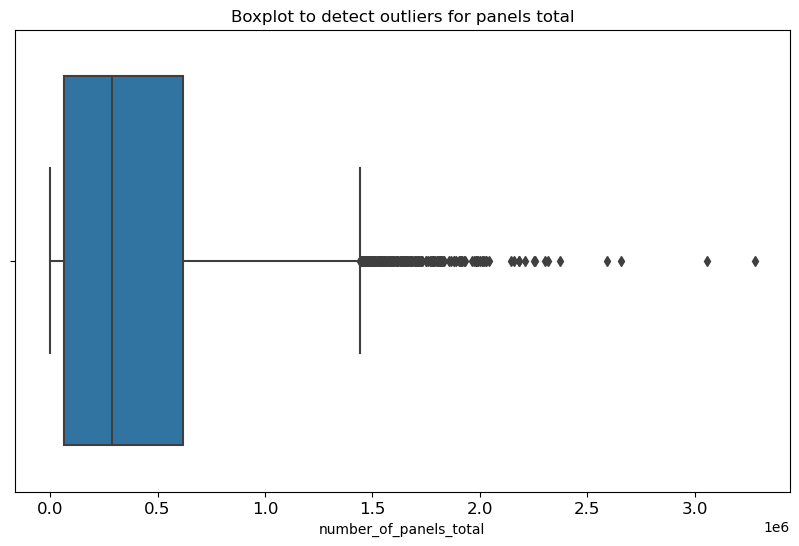

In [952]:
plt.figure(figsize=(10,6))
plt.title('Boxplot to detect outliers for panels total', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=solar_c['number_of_panels_total'])
plt.show()

In [953]:
# Number of rows with outliers number_of_panels_total

percentile25 = solar_c['number_of_panels_total'].quantile(0.25)

percentile75 = solar_c['number_of_panels_total'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

outliers = solar_c[(solar_c['number_of_panels_total'] > upper_limit) | (solar_c['number_of_panels_total'] < lower_limit)]

print("Number of rows in the data containing outliers in `number_of_panels_total`:", len(outliers))

Upper limit: 1443379.0
Lower limit: -761061.0
Number of rows in the data containing outliers in `number_of_panels_total`: 202


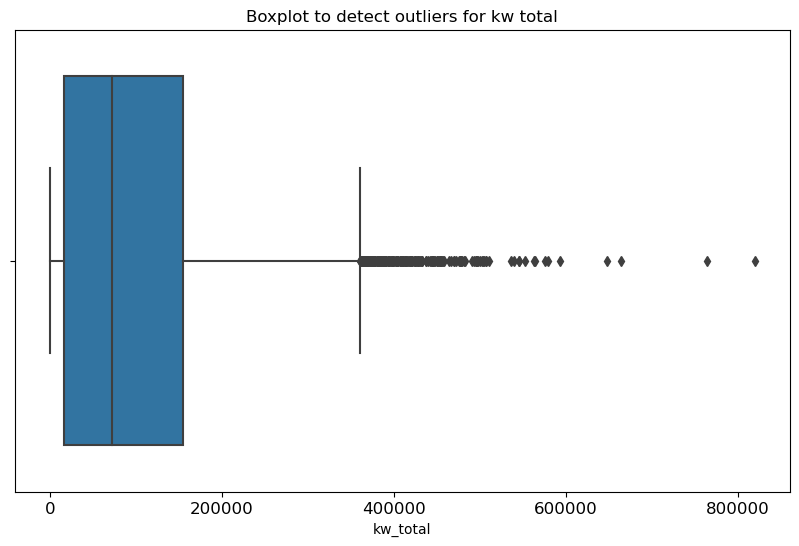

In [954]:
plt.figure(figsize=(10,6))
plt.title('Boxplot to detect outliers for kw total', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=solar_c['kw_total'])
plt.show()

In [955]:
# Number of rows with outliers kw_total

percentile25 = solar_c['kw_total'].quantile(0.25)

percentile75 = solar_c['kw_total'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

outliers = solar_c[(solar_c['kw_total'] > upper_limit) | (solar_c['kw_total'] < lower_limit)]

print("Number of rows in the data containing outliers in `kw_total`:", len(outliers))

Upper limit: 360844.75
Lower limit: -190265.25
Number of rows in the data containing outliers in `kw_total`: 202


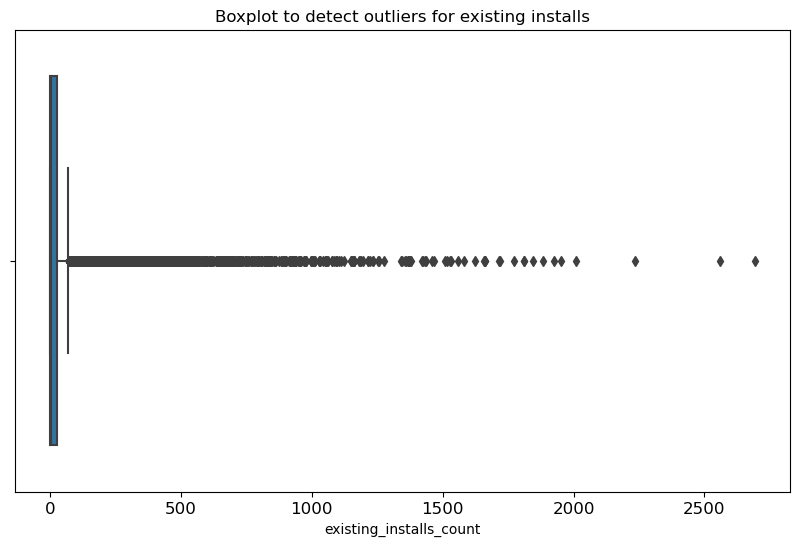

In [956]:
plt.figure(figsize=(10,6))
plt.title('Boxplot to detect outliers for existing installs', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=solar_c['existing_installs_count'])
plt.show()

In [957]:
# Number of rows with outliers existing_installs_count

percentile25 = solar_c['existing_installs_count'].quantile(0.25)

percentile75 = solar_c['existing_installs_count'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

outliers = solar_c[(solar_c['existing_installs_count'] > upper_limit) | (solar_c['existing_installs_count'] < lower_limit)]

print("Number of rows in the data containing outliers in `existing_installs_count`:", len(outliers))

Upper limit: 70.0
Lower limit: -42.0
Number of rows in the data containing outliers in `existing_installs_count`: 1842


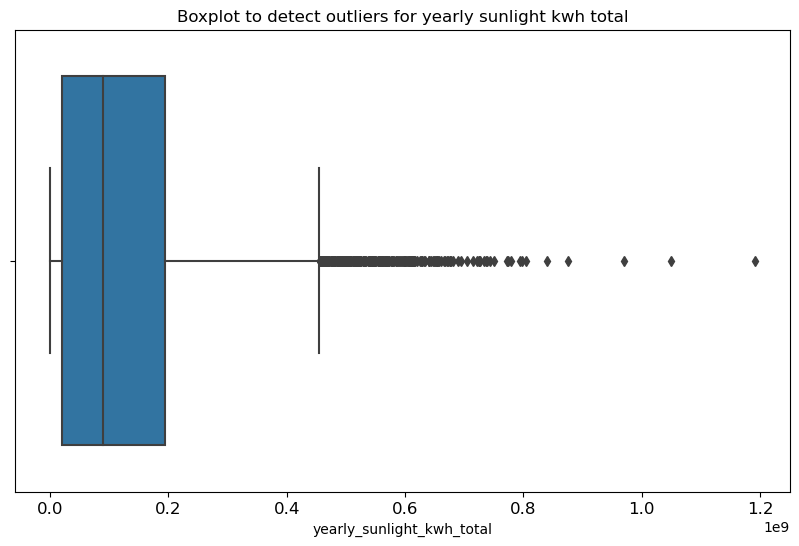

In [958]:
plt.figure(figsize=(10,6))
plt.title('Boxplot to detect outliers for yearly sunlight kwh total', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=solar_c['yearly_sunlight_kwh_total'])
plt.show()

In [959]:
# Number of rows with outliers yearly_sunlight_kwh_total

percentile25 = solar_c['yearly_sunlight_kwh_total'].quantile(0.25)

percentile75 = solar_c['yearly_sunlight_kwh_total'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

outliers = solar_c[(solar_c['yearly_sunlight_kwh_total'] > upper_limit) | (solar_c['yearly_sunlight_kwh_total'] < lower_limit)]

print("Number of rows in the data containing outliers in `yearly_sunlight_kwh_total`:", len(outliers))

Upper limit: 455681133.84472656
Lower limit: -241695370.76079106
Number of rows in the data containing outliers in `yearly_sunlight_kwh_total`: 310


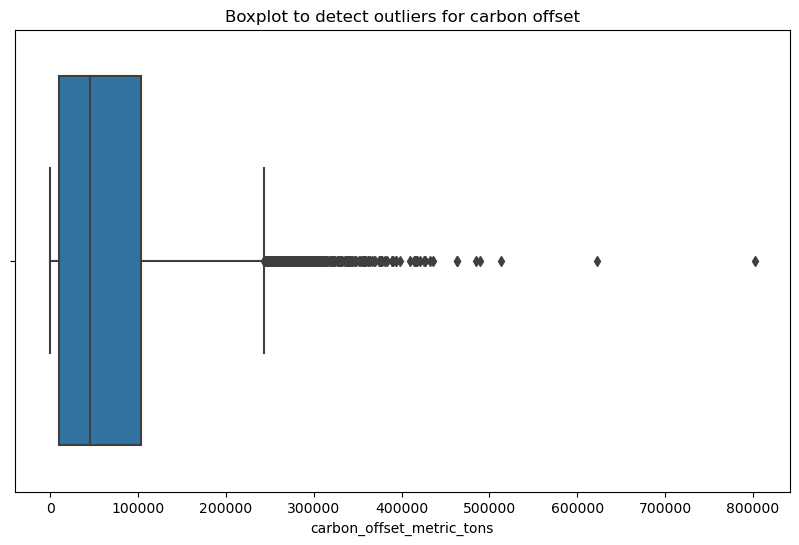

In [960]:
plt.figure(figsize=(10,6))
plt.title('Boxplot to detect outliers for carbon offset', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=12)
sns.boxplot(x=solar_c['carbon_offset_metric_tons'])
plt.show()

In [961]:
# Number of rows with outliers carbon_offset_metric_tons

percentile25 = solar_c['carbon_offset_metric_tons'].quantile(0.25)

percentile75 = solar_c['carbon_offset_metric_tons'].quantile(0.75)

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)

outliers = solar_c[(solar_c['carbon_offset_metric_tons'] > upper_limit) | (solar_c['carbon_offset_metric_tons'] < lower_limit)]

print("Number of rows in the data containing outliers in `carbon_offset_metric_tons`:", len(outliers))

Upper limit: 243076.03940914077
Lower limit: -128829.60474048876
Number of rows in the data containing outliers in `carbon_offset_metric_tons`: 331


In [962]:
# Visualizing variable relationships

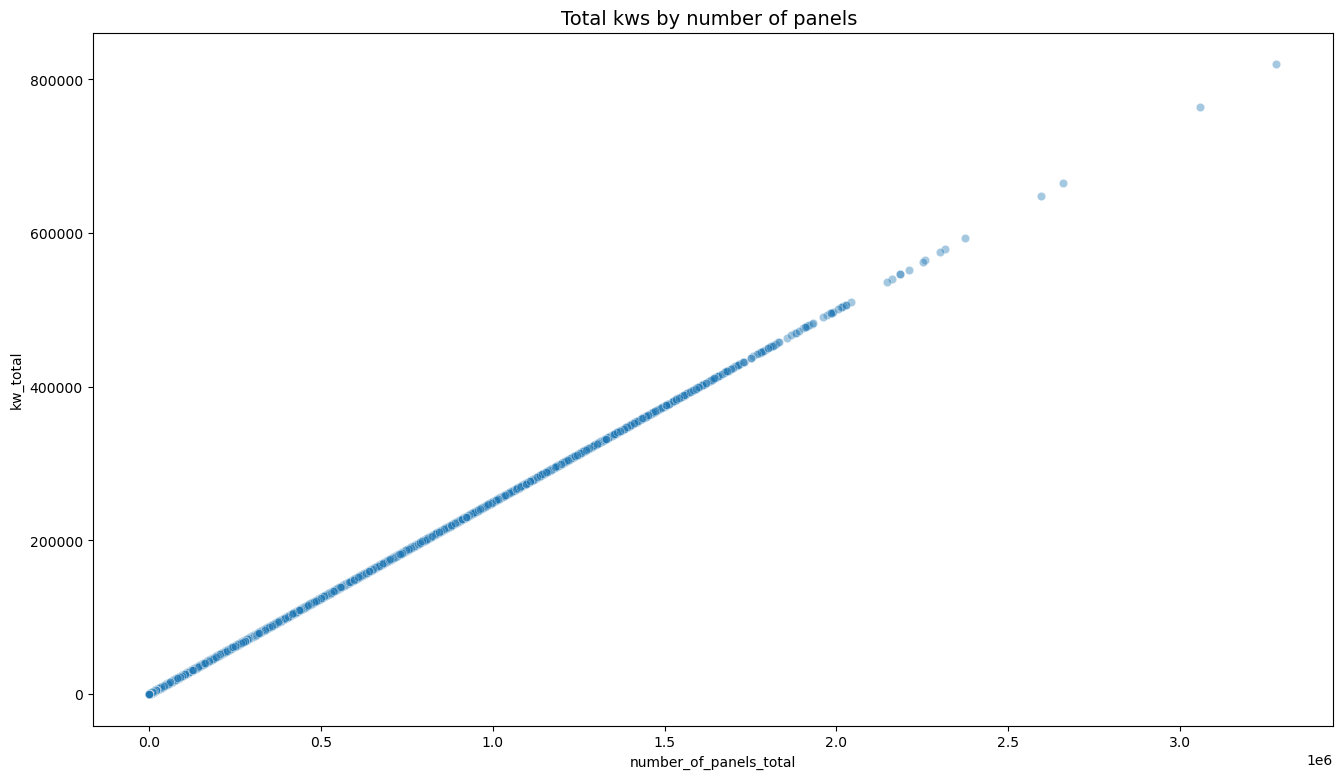

In [963]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=solar_c, x='number_of_panels_total', y='kw_total', alpha=0.4)
plt.title('Total kws by number of panels ', fontsize='14');

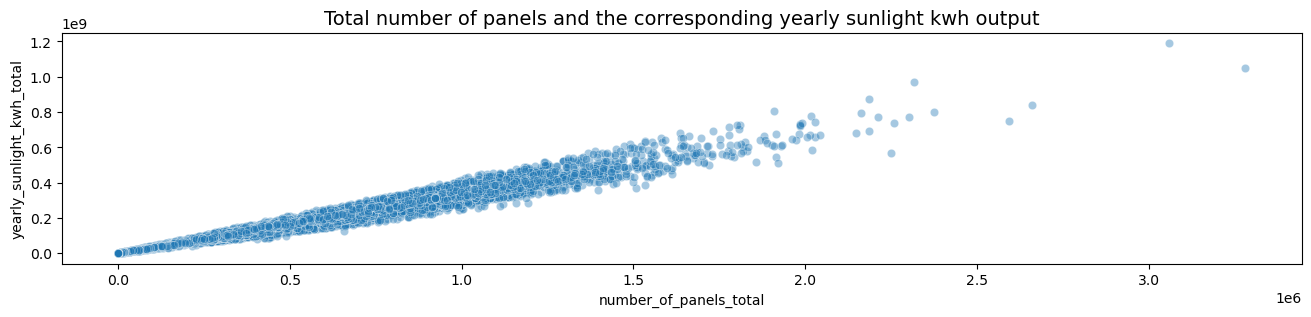

In [964]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=solar_c, x='number_of_panels_total', y='yearly_sunlight_kwh_total', alpha=0.4)
plt.title('Total number of panels and the corresponding yearly sunlight kwh output', fontsize='14');

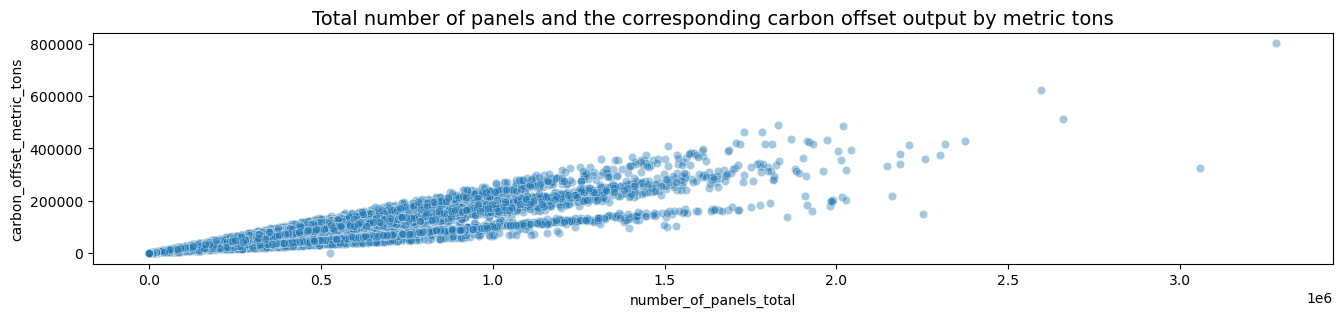

In [965]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=solar_c, x='number_of_panels_total', y='carbon_offset_metric_tons', alpha=0.4)
plt.title('Total number of panels and the corresponding carbon offset output by metric tons', fontsize='14');

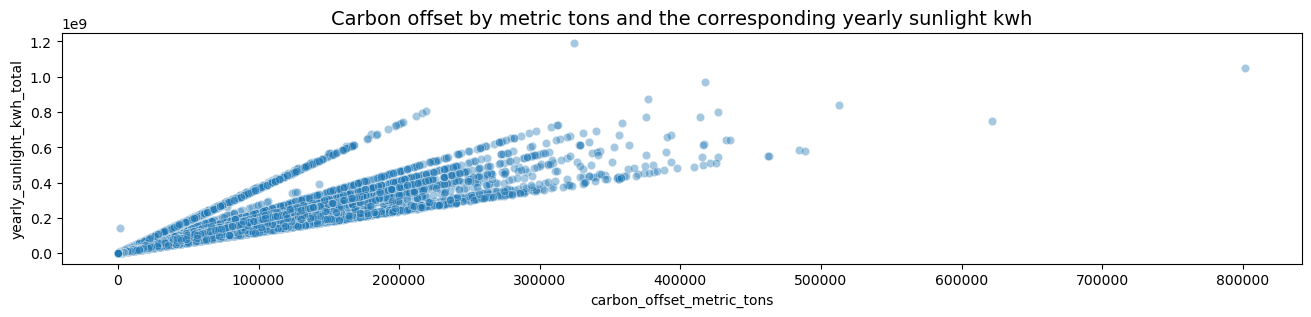

In [966]:
plt.figure(figsize=(16, 3))
sns.scatterplot(data=solar_c, x='carbon_offset_metric_tons', y='yearly_sunlight_kwh_total', alpha=0.4)
plt.title('Carbon offset by metric tons and the corresponding yearly sunlight kwh', fontsize='14');

In [967]:
# existing installs plots

In [968]:
conditions = [
    (solar_c['existing_installs_count'] == 0),
    (solar_c['existing_installs_count'] >= 1)
    ]

values = ['0', '1']

solar_c['installs_exist_num'] = np.select(conditions, values)

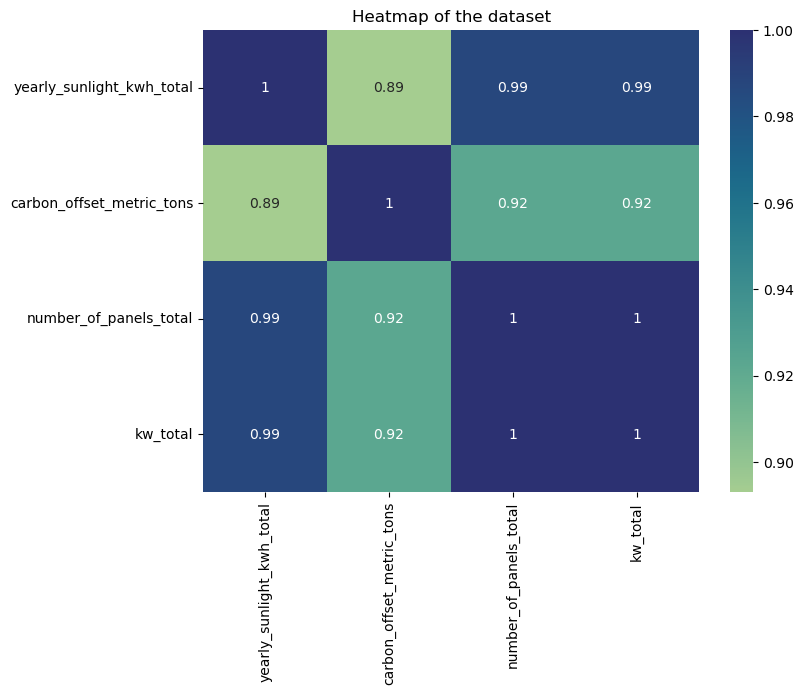

In [969]:
plt.figure(figsize=(8, 6))
sns.heatmap(solar_c[['yearly_sunlight_kwh_total', 'carbon_offset_metric_tons', 'number_of_panels_total', 'kw_total']]
.corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

In [970]:
print(solar_c['installs_exist_num'].value_counts())
print()
print(solar_c['installs_exist_num'].value_counts(normalize=True))

installs_exist_num
1    8249
0    3248
Name: count, dtype: int64

installs_exist_num
1    0.717492
0    0.282508
Name: proportion, dtype: float64


In [971]:
# plot top 5 states

In [972]:
top5_states = solar_c.loc[(solar_c['state_name'] == 'California') | (solar_c['state_name'] == 'Texas') | (solar_c['state_name'] == 'Florida') | (solar_c['state_name'] == 'Ohio') | (solar_c['state_name'] == 'Illinois')]

In [973]:
top5_states.head()

,region_name,state_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point,installs_exist,installs_exist_num
23,75371,Texas,32.791974,-96.773354,14,416,96.774194,3.5,104.00,4194.999854,1.362993e+05,66.280486,0,POINT(-96.7733536516129 32.7919737387097),no,0
24,92386,California,34.242019,-116.827513,14,2978,96.021841,3.5,744.50,5336.520386,1.184395e+06,322.902771,0,POINT(-116.827512829095 34.2420186792512),no,0
88,43608,Ohio,41.679176,-83.534401,18,217749,99.421661,4.5,54437.25,4953.265637,6.066998e+07,50225.879883,0,POINT(-83.5344011212409 41.6791758173107),no,0
89,43610,Ohio,41.676886,-83.558027,18,68602,99.082168,4.5,17150.50,4826.595508,1.925071e+07,15936.774891,0,POINT(-83.5580268570803 41.6768860890734),no,0
90,44123,Ohio,41.602315,-81.526277,18,170804,98.439962,4.5,42701.00,4978.678687,4.651181e+07,38494.289173,11,POINT(-81.5262773152065 41.6023153734478),yes,1


In [974]:
top5_states.head()

,region_name,state_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point,installs_exist,installs_exist_num
23,75371,Texas,32.791974,-96.773354,14,416,96.774194,3.5,104.00,4194.999854,1.362993e+05,66.280486,0,POINT(-96.7733536516129 32.7919737387097),no,0
24,92386,California,34.242019,-116.827513,14,2978,96.021841,3.5,744.50,5336.520386,1.184395e+06,322.902771,0,POINT(-116.827512829095 34.2420186792512),no,0
88,43608,Ohio,41.679176,-83.534401,18,217749,99.421661,4.5,54437.25,4953.265637,6.066998e+07,50225.879883,0,POINT(-83.5344011212409 41.6791758173107),no,0
89,43610,Ohio,41.676886,-83.558027,18,68602,99.082168,4.5,17150.50,4826.595508,1.925071e+07,15936.774891,0,POINT(-83.5580268570803 41.6768860890734),no,0
90,44123,Ohio,41.602315,-81.526277,18,170804,98.439962,4.5,42701.00,4978.678687,4.651181e+07,38494.289173,11,POINT(-81.5262773152065 41.6023153734478),yes,1


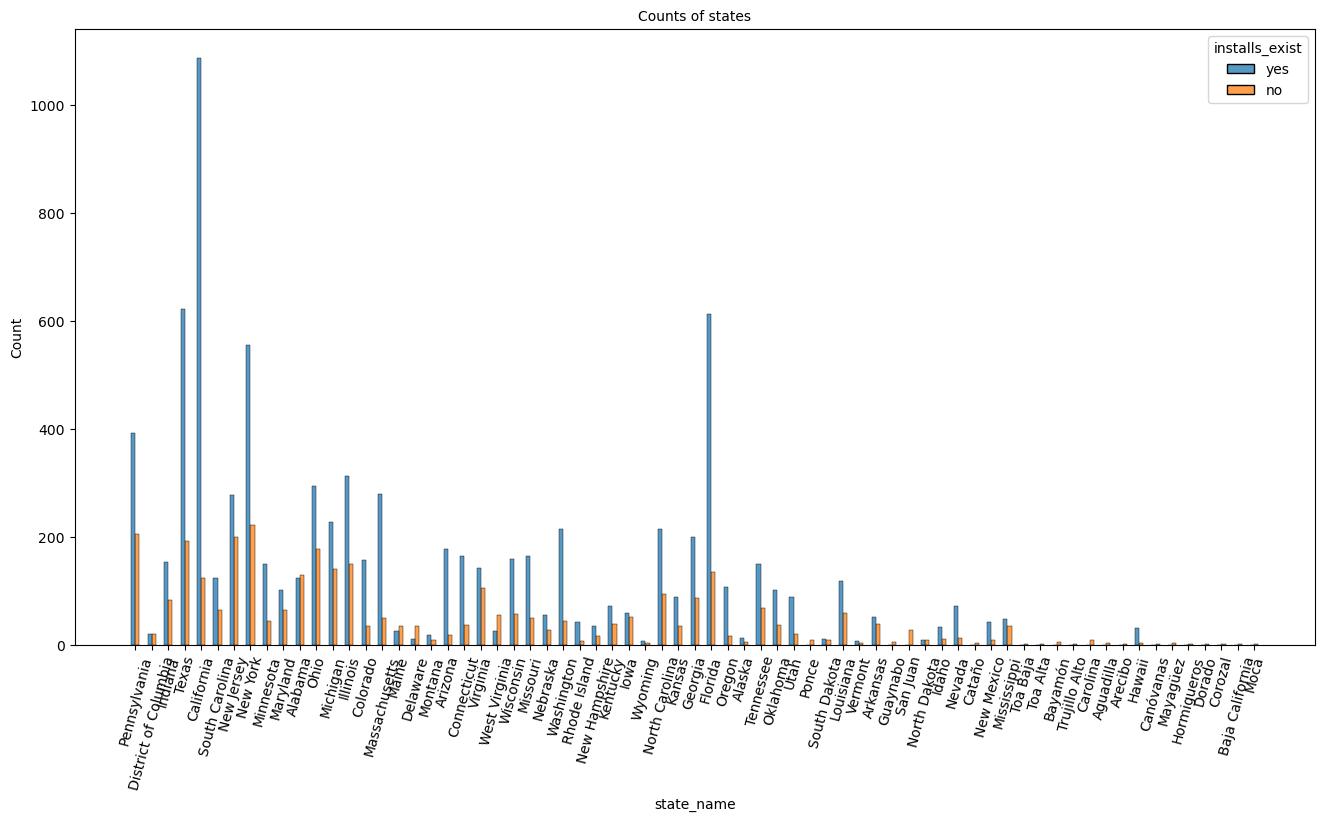

In [975]:
plt.figure(figsize=(16,8))
sns.histplot(data=solar_c, x='state_name', hue='installs_exist', discrete=1, multiple='dodge', shrink=.5)
plt.xticks(rotation=75)
plt.title('Counts of states', fontsize=10);

In [976]:
solar_c.groupby(['state_name']).sum().sort_values('number_of_panels_total', ascending=False).head(10)

,region_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point,installs_exist,installs_exist_num
state_name,,,,,,,,,,,,,,,
California,112756426,43157.942832,-144800.542314,92409,652983168,108811.356155,23102.25,1.632458e+08,3.415406e+07,2.426384e+11,6.687863e+07,331274,POINT(-116.827512829095 34.2420186792512)POINT...,noyesnoyesyesyesyesyesyesyesyesyesyesyesyesyes...,0101111111111111111111111111101101111111111111...
Texas,62965374,25290.650437,-79366.578089,59657,480505530,66303.101447,14914.25,1.201264e+08,1.995835e+07,1.600396e+11,7.982047e+07,14127,POINT(-96.7733536516129 32.7919737387097)POINT...,noyesnoyesyesnoyesyesyesyesnonoyesyesyesyesnon...,0101101111001111001111110111101111111111111111...
Florida,24996289,20866.875773,-61140.745107,72743,462105732,62155.198984,18185.75,1.155264e+08,2.506018e+07,1.576179e+11,8.457291e+07,105292,POINT(-86.6740217225563 30.7980965938346)POINT...,nononoyesnoyesyesyesyesyesyesyesyesnoyesyesyes...,0001011111111011111011111110101011111111111111...
Ohio,20996016,19099.760185,-39052.397568,40312,171022353,37425.534003,10078.00,4.275559e+07,1.129143e+07,4.804854e+10,3.977681e+07,2840,POINT(-83.5344011212409 41.6791758173107)POINT...,nonoyesnoyesyesnonononoyesyesyesyesnonoyesyesy...,0010110000111100111111101111111100011111001111...
Illinois,28085245,19047.306550,-40777.825109,44355,163236997,37663.028507,11088.75,4.080925e+07,1.286032e+07,4.704785e+10,3.877675e+07,2447,POINT(-88.980976412 39.779056172)POINT(-87.624...,noyesnonoyesyesyesyesyesyesyesyesyesyesyesyesy...,0100111111111111111111100111010111111111101011...
New York,9290262,32322.559706,-57928.688621,52556,157857812,66245.303429,13139.00,3.946445e+07,1.453766e+07,4.483145e+10,2.179851e+07,18744,POINT(-73.9677803240001 41.55380542)POINT(-73....,noyesyesyesyesyesnoyesnononoyesyesnoyesnoyesye...,0111110100011010111111111111011011111101111101...
Michigan,17877916,15698.796784,-30912.249763,38528,147391827,28060.984610,9632.00,3.684796e+07,1.071408e+07,4.084003e+10,3.206341e+07,1717,POINT(-83.1810317394443 42.2421690416042)POINT...,nonoyesyesyesyesyesnoyesyesnoyesyesyesyesyesye...,0011111011011111111100100011111101101111101110...
Arizona,16743895,6534.796764,-21923.649663,13543,147238408,17143.853105,3385.75,3.680960e+07,5.442913e+06,5.904301e+10,2.535756e+07,39696,POINT(-111.921545426635 34.7253594688369)POINT...,noyesyesyesyesnonoyesyesyesyesnonoyesyesyesyes...,0111100111100111111111111111111111111111111111...
Georgia,8746758,9567.504483,-24005.487663,20613,139653741,20599.735305,5153.25,3.491344e+07,6.490552e+06,4.458106e+10,2.667352e+07,1906,POINT(-84.4787389920001 33.802352232)POINT(-84...,nonoyesyesyesyesnoyesyesyesnoyesyesyesyesyesye...,0011110111011111111111011110011111111111111111...


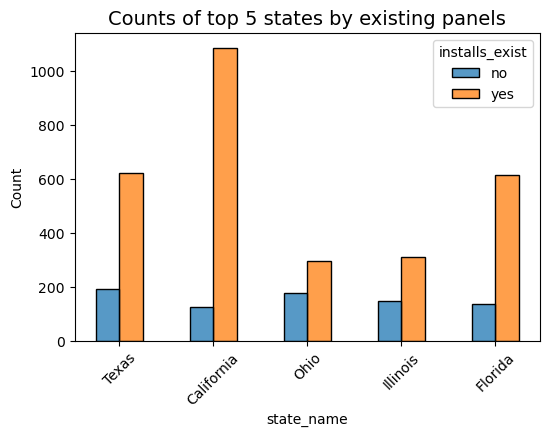

In [977]:
plt.figure(figsize=(6,4))
sns.histplot(data=top5_states, x='state_name', hue='installs_exist', discrete=1, multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of top 5 states by existing panels', fontsize=14);

In [978]:
bottom3_states = solar_c.loc[(solar_c['state_name'] == 'Maine') | (solar_c['state_name'] == 'Delaware') | (solar_c['state_name'] == 'West Virginia')]

In [979]:
bottom3_states.head()

,region_name,state_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point,installs_exist,installs_exist_num
110,4108,Maine,43.659065,-70.192781,18,13979,89.212008,4.50,3494.75,5180.208374,4.005008e+06,1729.268787,20,POINT(-70.1927806344277 43.6590654134146),yes,1
138,19802,Delaware,39.757150,-75.533454,19,307756,96.991930,4.75,76939.00,5636.508130,9.227816e+07,58639.140889,0,POINT(-75.5334536126924 39.757149881482),no,0
139,19805,Delaware,39.743372,-75.582385,19,397552,96.934161,4.75,99388.00,5657.162030,1.185394e+08,75327.124428,0,POINT(-75.5823851112977 39.7433718344447),no,0
140,19806,Delaware,39.758052,-75.563664,19,94456,98.907681,4.75,23614.00,5623.404828,2.786660e+07,17708.124905,0,POINT(-75.5636642409443 39.7580524577519),no,0
164,3905,Maine,43.086122,-70.692692,19,3388,30.904184,4.75,847.00,5437.277759,9.794507e+05,424.092644,0,POINT(-70.6926918866397 43.0861223116059),no,0


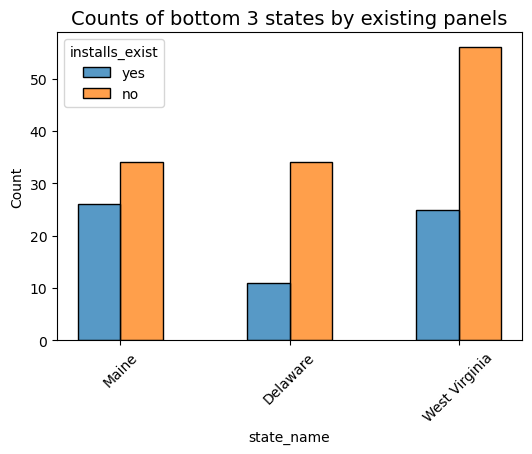

In [980]:
plt.figure(figsize=(6,4))
sns.histplot(data=bottom3_states, x='state_name', hue='installs_exist', discrete=1, multiple='dodge', shrink=.5)
plt.xticks(rotation=45)
plt.title('Counts of bottom 3 states by existing panels', fontsize=14);

In [981]:
solar_c.groupby(['installs_exist_num'])['carbon_offset_metric_tons'].agg([np.mean,np.median])

,mean,median
installs_exist_num,,
0,23881.433539,3335.313819
1,85688.045575,66455.050100


In [982]:
solar_c.groupby(['installs_exist_num'])['kw_total'].agg([np.mean,np.median])

,mean,median
installs_exist_num,,
0,31530.948430,4723.375
1,125682.350133,105773.250


In [983]:
solar_c.groupby(['installs_exist_num'])['percent_covered'].agg([np.mean,np.median])

,mean,median
installs_exist_num,,
0,60.231618,80.000000
1,87.240569,96.646341


In [984]:
solar_c.groupby(['installs_exist_num'])['number_of_panels_total'].agg([np.mean,np.median])

,mean,median
installs_exist_num,,
0,126123.793719,18893.5
1,502729.400533,423093.0


In [985]:
solar_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11497 entries, 0 to 11496
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   region_name                 11497 non-null  int64  
 1   state_name                  11497 non-null  object 
 2   lat_avg                     11497 non-null  float64
 3   lng_avg                     11497 non-null  float64
 4   number_of_panels_median     11497 non-null  int64  
 5   number_of_panels_total      11497 non-null  int64  
 6   percent_covered             11497 non-null  float64
 7   kw_median                   11497 non-null  float64
 8   kw_total                    11497 non-null  float64
 9   yearly_sunlight_kwh_median  11497 non-null  float64
 10  yearly_sunlight_kwh_total   11497 non-null  float64
 11  carbon_offset_metric_tons   11497 non-null  float64
 12  existing_installs_count     11497 non-null  int64  
 13  center_point                114

In [986]:
solar_c.head()

,region_name,state_name,lat_avg,lng_avg,number_of_panels_median,number_of_panels_total,percent_covered,kw_median,kw_total,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,center_point,installs_exist,installs_exist_num
0,19149,Pennsylvania,40.037404,-75.065705,11,164342,90.102627,2.75,41085.50,3332.078650,4.901625e+07,31147.899203,3,POINT(-75.0657051746548 40.0374044403417),yes,1
1,19120,Pennsylvania,40.034398,-75.120887,12,263706,89.833650,3.00,65926.50,3572.812305,7.826531e+07,49734.525773,2,POINT(-75.120887243506 40.0343982932811),yes,1
2,19132,Pennsylvania,39.995681,-75.169645,12,210495,88.181975,3.00,52623.75,3379.915637,6.231354e+07,39597.801378,0,POINT(-75.169645159245 39.9956814907579),no,0
3,19134,Pennsylvania,39.992451,-75.111935,12,444312,90.754669,3.00,111078.00,3582.464453,1.325080e+08,84203.600230,3,POINT(-75.1119347717865 39.9924510629131),yes,1
4,19138,Pennsylvania,40.056627,-75.156949,12,117861,93.056346,3.00,29465.25,3545.397314,3.479628e+07,22111.668631,3,POINT(-75.1569492782584 40.0566267715424),yes,1


In [987]:
solard = solar_c.drop('region_name', axis=1)

In [988]:
solard = solard.drop('lat_avg', axis=1)

In [989]:
solard = solard.drop('lng_avg', axis=1)

In [990]:
solard = solard.drop('center_point', axis=1)

In [991]:
solard = solard.drop('kw_median', axis=1)

In [992]:
solard = solard.drop('number_of_panels_median', axis=1)

In [993]:
solard = solard.drop('yearly_sunlight_kwh_median', axis=1)

In [994]:
solard.head()

,state_name,number_of_panels_total,percent_covered,kw_total,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,installs_exist,installs_exist_num
0,Pennsylvania,164342,90.102627,41085.50,4.901625e+07,31147.899203,3,yes,1
1,Pennsylvania,263706,89.833650,65926.50,7.826531e+07,49734.525773,2,yes,1
2,Pennsylvania,210495,88.181975,52623.75,6.231354e+07,39597.801378,0,no,0
3,Pennsylvania,444312,90.754669,111078.00,1.325080e+08,84203.600230,3,yes,1
4,Pennsylvania,117861,93.056346,29465.25,3.479628e+07,22111.668631,3,yes,1


In [995]:
solard.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11497 entries, 0 to 11496
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   state_name                 11497 non-null  object 
 1   number_of_panels_total     11497 non-null  int64  
 2   percent_covered            11497 non-null  float64
 3   kw_total                   11497 non-null  float64
 4   yearly_sunlight_kwh_total  11497 non-null  float64
 5   carbon_offset_metric_tons  11497 non-null  float64
 6   existing_installs_count    11497 non-null  int64  
 7   installs_exist             11497 non-null  object 
 8   installs_exist_num         11497 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 808.5+ KB


In [996]:
solard['installs_exist'].value_counts(normalize=True)

installs_exist
yes    0.717492
no     0.282508
Name: proportion, dtype: float64

In [997]:
# new variable: kws from each panel

In [998]:
solard['kws_per_panel'] = solard['kw_total'] / solard['number_of_panels_total']

In [999]:
solard.head()

,state_name,number_of_panels_total,percent_covered,kw_total,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,installs_exist,installs_exist_num,kws_per_panel
0,Pennsylvania,164342,90.102627,41085.50,4.901625e+07,31147.899203,3,yes,1,0.25
1,Pennsylvania,263706,89.833650,65926.50,7.826531e+07,49734.525773,2,yes,1,0.25
2,Pennsylvania,210495,88.181975,52623.75,6.231354e+07,39597.801378,0,no,0,0.25
3,Pennsylvania,444312,90.754669,111078.00,1.325080e+08,84203.600230,3,yes,1,0.25
4,Pennsylvania,117861,93.056346,29465.25,3.479628e+07,22111.668631,3,yes,1,0.25


In [1000]:
# It takes exactly 4 panels to produce 1kw

In [1001]:
solard['kws_per_panel'].describe()

count    11497.00
mean         0.25
std          0.00
min          0.25
25%          0.25
50%          0.25
75%          0.25
max          0.25
Name: kws_per_panel, dtype: float64

In [1002]:
solard['kws_per_panel'].value_counts(normalize=True)

kws_per_panel
0.25    1.0
Name: proportion, dtype: float64

In [1003]:
solard['yearly_sunlight_kwh_per_panel'] = solard['yearly_sunlight_kwh_total'] / solard['number_of_panels_total']

In [1004]:
solard['yearly_sunlight_kwh_per_panel'].describe()

count    11497.000000
mean       312.609990
std         36.906904
min        190.156973
25%        284.676219
50%        306.223182
75%        334.565121
max        429.045894
Name: yearly_sunlight_kwh_per_panel, dtype: float64

In [1005]:
# A yearly average of 313 kwh from sunlight for each panel

In [1006]:
solard['carbon_offset_mtons_per_panel'] = solard['carbon_offset_metric_tons'] / solard['number_of_panels_total']

In [1007]:
solard['carbon_offset_mtons_per_panel'].describe()

count    11497.000000
mean         0.173722
std          0.050298
min          0.000000
25%          0.128345
50%          0.182938
75%          0.217117
max          0.271784
Name: carbon_offset_mtons_per_panel, dtype: float64

In [1008]:
# each panel averages .17 metric tons of carbon offset 

In [1009]:
solard['carbon_offset_mtons_per_kw'] = solard['carbon_offset_metric_tons'] / solard['kw_total']

In [1010]:
solard['carbon_offset_mtons_per_kw'].describe()

count    11497.000000
mean         0.694889
std          0.201191
min          0.000000
25%          0.513380
50%          0.731753
75%          0.868468
max          1.087137
Name: carbon_offset_mtons_per_kw, dtype: float64

In [1011]:
# each kw averages .69 metric tons of carbon offset 

In [1012]:
solard.head()

,state_name,number_of_panels_total,percent_covered,kw_total,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,installs_exist,installs_exist_num,kws_per_panel,yearly_sunlight_kwh_per_panel,carbon_offset_mtons_per_panel,carbon_offset_mtons_per_kw
0,Pennsylvania,164342,90.102627,41085.50,4.901625e+07,31147.899203,3,yes,1,0.25,298.257616,0.189531,0.758124
1,Pennsylvania,263706,89.833650,65926.50,7.826531e+07,49734.525773,2,yes,1,0.25,296.790038,0.188598,0.754394
2,Pennsylvania,210495,88.181975,52623.75,6.231354e+07,39597.801378,0,no,0,0.25,296.033349,0.188118,0.752470
3,Pennsylvania,444312,90.754669,111078.00,1.325080e+08,84203.600230,3,yes,1,0.25,298.231812,0.189515,0.758058
4,Pennsylvania,117861,93.056346,29465.25,3.479628e+07,22111.668631,3,yes,1,0.25,295.231536,0.187608,0.750432


In [1013]:
solard.head()

,state_name,number_of_panels_total,percent_covered,kw_total,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,installs_exist,installs_exist_num,kws_per_panel,yearly_sunlight_kwh_per_panel,carbon_offset_mtons_per_panel,carbon_offset_mtons_per_kw
0,Pennsylvania,164342,90.102627,41085.50,4.901625e+07,31147.899203,3,yes,1,0.25,298.257616,0.189531,0.758124
1,Pennsylvania,263706,89.833650,65926.50,7.826531e+07,49734.525773,2,yes,1,0.25,296.790038,0.188598,0.754394
2,Pennsylvania,210495,88.181975,52623.75,6.231354e+07,39597.801378,0,no,0,0.25,296.033349,0.188118,0.752470
3,Pennsylvania,444312,90.754669,111078.00,1.325080e+08,84203.600230,3,yes,1,0.25,298.231812,0.189515,0.758058
4,Pennsylvania,117861,93.056346,29465.25,3.479628e+07,22111.668631,3,yes,1,0.25,295.231536,0.187608,0.750432


In [1014]:
solard = solard.drop('state_name', axis=1)

In [1015]:
solard = solard.drop('installs_exist', axis=1)

In [1016]:
# logistic regression

In [1017]:
solard.describe().applymap(lambda x: f"{x:0.2f}")

,number_of_panels_total,percent_covered,kw_total,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,kws_per_panel,yearly_sunlight_kwh_per_panel,carbon_offset_mtons_per_panel,carbon_offset_mtons_per_kw
count,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00,11497.00
mean,396335.12,79.61,99083.78,127767781.51,68227.15,58.75,0.25,312.61,0.17,0.69
std,390148.26,30.19,97537.06,132115129.25,72154.60,169.35,0.00,36.91,0.05,0.20
min,8.00,0.01,2.00,2405.86,0.00,0.00,0.25,190.16,0.00,0.00
25%,65604.00,75.21,16401.00,19820818.47,10635.01,0.00,0.25,284.68,0.13,0.51
50%,289766.00,95.54,72441.50,88862867.19,45152.27,5.00,0.25,306.22,0.18,0.73
75%,616714.00,98.42,154178.50,194164944.62,103611.42,28.00,0.25,334.57,0.22,0.87
max,3279590.00,100.00,819897.50,1190968010.33,801735.95,2692.00,0.25,429.05,0.27,1.09


In [1018]:
# collinearity

In [1019]:
solard.corr(method='pearson')

,number_of_panels_total,percent_covered,kw_total,yearly_sunlight_kwh_total,carbon_offset_metric_tons,existing_installs_count,installs_exist_num,kws_per_panel,yearly_sunlight_kwh_per_panel,carbon_offset_mtons_per_panel,carbon_offset_mtons_per_kw
number_of_panels_total,1.000000,0.374368,1.000000,0.987043,0.922630,0.384952,0.434610,NaN,0.268752,-0.031858,-0.031858
percent_covered,0.374368,1.000000,0.374368,0.359721,0.338996,0.161885,0.402809,NaN,0.071542,-0.074447,-0.074447
kw_total,1.000000,0.374368,1.000000,0.987043,0.922630,0.384952,0.434610,NaN,0.268752,-0.031858,-0.031858
yearly_sunlight_kwh_total,0.987043,0.359721,0.987043,1.000000,0.893072,0.445620,0.420249,NaN,0.377040,-0.055953,-0.055953
carbon_offset_metric_tons,0.922630,0.338996,0.922630,0.893072,1.000000,0.229549,0.385668,NaN,0.186214,0.247385,0.247385
existing_installs_count,0.384952,0.161885,0.384952,0.445620,0.229549,1.000000,0.217691,NaN,0.382011,-0.226344,-0.226344
installs_exist_num,0.434610,0.402809,0.434610,0.420249,0.385668,0.217691,1.000000,NaN,0.132591,-0.141317,-0.141317
kws_per_panel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
yearly_sunlight_kwh_per_panel,0.268752,0.071542,0.268752,0.377040,0.186214,0.382011,0.132591,NaN,1.000000,-0.122040,-0.122040
carbon_offset_mtons_per_panel,-0.031858,-0.074447,-0.031858,-0.055953,0.247385,-0.226344,-0.141317,NaN,-0.122040,1.000000,1.000000


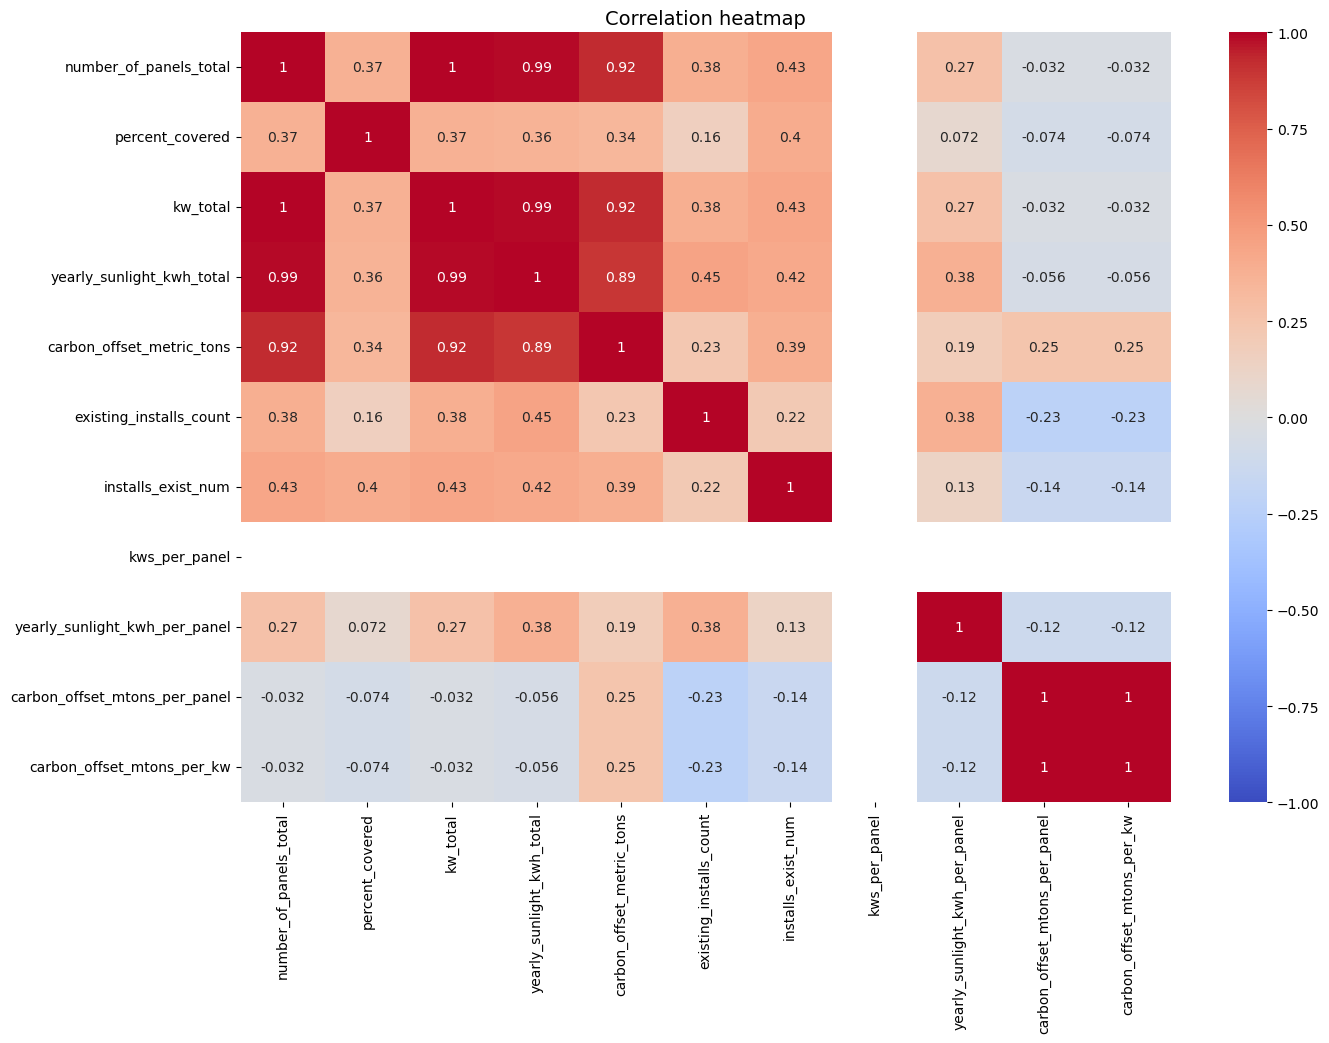

In [1020]:
plt.figure(figsize=(15,10))
sns.heatmap(solard.corr(method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation heatmap',
          fontsize=14)
plt.show();

In [805]:
# Strongly multicollinear if Pearson correlation coefficient value greater than the absolute value of 0.7 
# Only one of these variables will be used in model

In [1123]:
# Target variable
y = solard['installs_exist_num']

In [1125]:
# Predictor variables
X = solard.drop(columns = ['yearly_sunlight_kwh_total', 'percent_covered', 'installs_exist_num', 'kw_total', 'carbon_offset_mtons_per_panel', 'number_of_panels_total', 'kws_per_panel', 'existing_installs_count'])

In [1127]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [1129]:
X_train.head()

,carbon_offset_metric_tons,yearly_sunlight_kwh_per_panel,carbon_offset_mtons_per_kw
4555,61294.789452,348.040898,0.370188
6364,90353.704238,342.303421,0.730643
9029,125645.617478,321.041611,0.753865
5960,176805.767485,301.663276,1.018172
8703,17076.533563,299.489917,0.318547


In [1131]:
X.describe().applymap(lambda x: f"{x:0.2f}")

,carbon_offset_metric_tons,yearly_sunlight_kwh_per_panel,carbon_offset_mtons_per_kw
count,11497.00,11497.00,11497.00
mean,68227.15,312.61,0.69
std,72154.60,36.91,0.20
min,0.00,190.16,0.00
25%,10635.01,284.68,0.51
50%,45152.27,306.22,0.73
75%,103611.42,334.57,0.87
max,801735.95,429.05,1.09


In [1133]:
model = LogisticRegression(penalty=None, random_state=42, max_iter=400).fit(X_train, y_train)

In [1135]:
y_pred = model.predict(X_test)

In [1137]:
pd.Series(model.coef_[0], index=X.columns)

carbon_offset_metric_tons        0.000024
yearly_sunlight_kwh_per_panel   -0.000542
carbon_offset_mtons_per_kw      -0.000004
dtype: float64

In [1139]:
model.intercept_

array([-2.04126644e-06])

In [1141]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.21504728, 0.78495272],
       [0.11908614, 0.88091386],
       [0.05382371, 0.94617629],
       ...,
       [0.17405395, 0.82594605],
       [0.31373349, 0.68626651],
       [0.40401981, 0.59598019]])

In [1143]:
logit_data = X_train.copy()
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

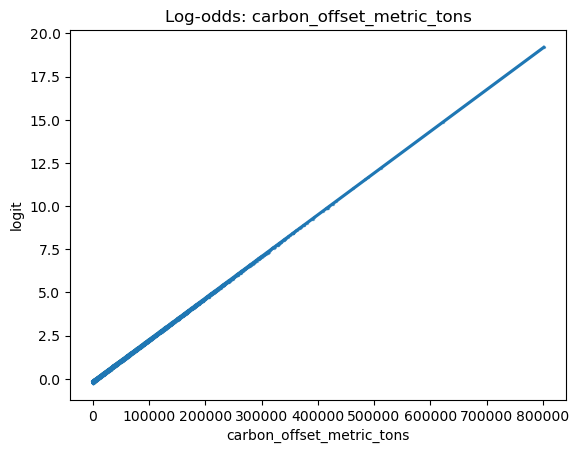

In [1145]:
sns.regplot(x='carbon_offset_metric_tons', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: carbon_offset_metric_tons');

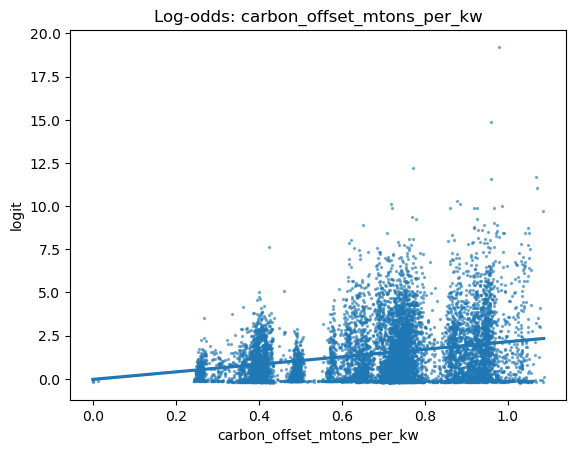

In [1147]:
sns.regplot(x='carbon_offset_mtons_per_kw', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: carbon_offset_mtons_per_kw');

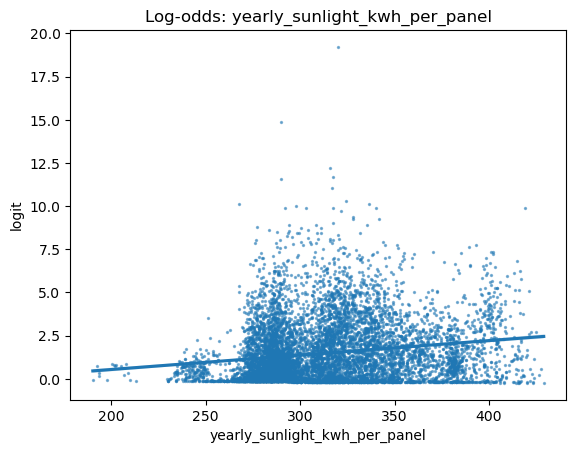

In [1149]:
sns.regplot(x='yearly_sunlight_kwh_per_panel', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: yearly_sunlight_kwh_per_panel');

In [1151]:
y_preds = model.predict(X_test)

In [1153]:
model.score(X_test, y_test)

0.8389565217391305

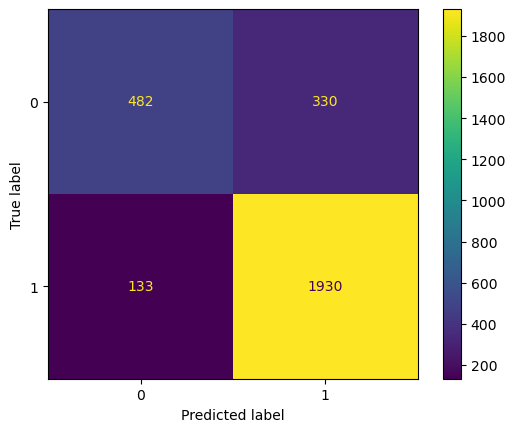

In [1155]:
# Confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=model.classes_)
log_disp.plot(values_format='')
plt.show()

In [1157]:
solard['installs_exist_num'].value_counts(normalize=True)

installs_exist_num
1    0.717492
0    0.282508
Name: proportion, dtype: float64

In [1159]:
# Classification Report: support = true negatives + false positives (top row) & false negatives + true positives (bottom row). 
target_names = ['predicted installs would not exist', 'predicted installs would exist']
print(classification_report(y_test, y_pred, target_names=target_names))

                                    precision    recall  f1-score   support

predicted installs would not exist       0.78      0.59      0.68       812
    predicted installs would exist       0.85      0.94      0.89      2063

                          accuracy                           0.84      2875
                         macro avg       0.82      0.76      0.78      2875
                      weighted avg       0.83      0.84      0.83      2875



In [1161]:
feature_importance = list(zip(X_train.columns, model.coef_[0]))
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('carbon_offset_metric_tons', 2.4200474215970198e-05),
 ('carbon_offset_mtons_per_kw', -3.7145740485332118e-06),
 ('yearly_sunlight_kwh_per_panel', -0.0005418731124890244)]

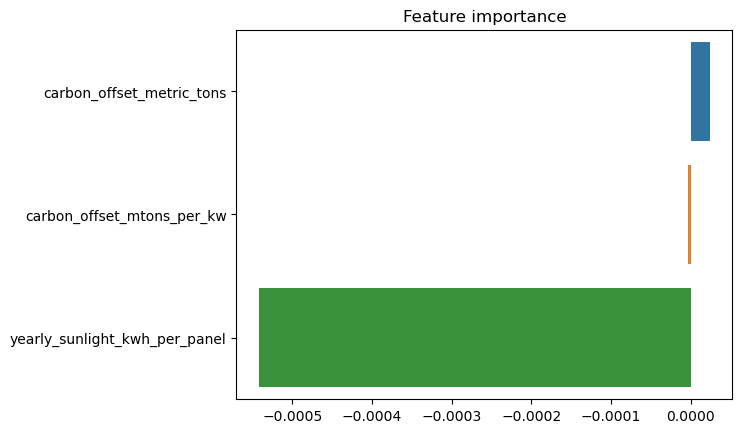

In [1163]:
sns.barplot(x=[x[1] for x in feature_importance],
y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');